In [411]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os

# load in directories
from experiment_code.constants import Defaults

In [412]:
# load in data from gorilla
df = pd.read_csv(os.path.join(Defaults.RAW_DIR, "gorilla_v2.csv"))


In [413]:
# filter dataframe to remove redundant cols
df_filtered = df.filter({'Experiment ID', 'Experiment Version', 'Task Version', 'Participant Private ID',
           'counterbalance-mpke', 'Spreadsheet Row', 'Zone Type', 
           'Reaction Time', 'Response', 'display', 'iti_dur_ms', 
           'trial_dur_ms', 'V1', 'V2', 'V2', 'V3', 'V4', 'V5',
          'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12'})

In [414]:
# clean spreadsheet
df_filtered = df_filtered.rename({'Zone Type':'Zone_Type'}, axis=1)
df_filtered = df_filtered.rename({'Participant Private ID':'Participant_Private_ID'}, axis=1)
df_filtered.columns

Index(['V3', 'Task Version', 'V6', 'V1', 'V5', 'Zone_Type', 'Reaction Time',
       'V10', 'display', 'Experiment ID', 'trial_dur_ms', 'Spreadsheet Row',
       'V9', 'V12', 'Experiment Version', 'Participant_Private_ID', 'V11',
       'V2', 'counterbalance-mpke', 'V7', 'V4', 'V8', 'iti_dur_ms',
       'Response'],
      dtype='object')

In [415]:
# select response-only rows and re-index
df_filtered = df_filtered.query('Zone_Type=="response_rating_scale_likert"')
df_filtered = df_filtered.reset_index()
del df_filtered['index']

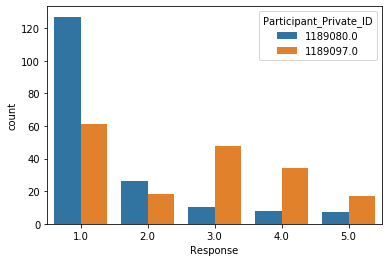

In [416]:
#Investigate Outlier in V8
df_filtered_V8 = df_filtered.loc[df_filtered['counterbalance-mpke'] == "V8"]
df_filtered_V8.Participant_Private_ID.unique()
sns.countplot(x='Response', hue='Participant_Private_ID', data= df_filtered_V8)

In [417]:
#Drop Outlier in V8
df_where_outlier = df_filtered[df_filtered.Participant_Private_ID == 1189080.0]
print(df_where_outlier.index)
df_filtered = df_filtered.drop(df_filtered.index[0:178])
df_filtered

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            168, 169, 170, 171, 172, 173, 174, 175, 176, 177],
           dtype='int64', length=178)


,V3,Task Version,V6,V1,V5,Zone_Type,Reaction Time,V10,display,Experiment ID,...,Experiment Version,Participant_Private_ID,V11,V2,counterbalance-mpke,V7,V4,V8,iti_dur_ms,Response
178,"Every morning, Liz would carefully brush her hair",19.0,"While in the city, Amanda didn't feel safe",He hated bees and feared encountering a hive,His brand new soccer ball had landed in the mud,response_rating_scale_likert,9993.326,The business owner was scared that his busines...,trial,13726.0,...,10.0,1189081.0,Abby stuck his picture to her wall with a tack,Amber missed the bus even though she yelled stop,V6,The farmer used the extra corn he had as feed,The landscaper went to the branch and started ...,Little Gracie said the most boring place ever ...,500.0,1.0
179,The young girl told her mom she wanted longer ...,19.0,"At the hotel, Kevin kept his valuables in the ...",Above the treehouse were the bees made their hive,The hiker's new boots were stuck in the deep mud,response_rating_scale_likert,9993.388,Nina had no confidence and always expected to ...,trial,13726.0,...,10.0,1189081.0,Frankie had four plants getting sunned on the ...,A village was discovered between the mountains...,V6,The worried mother had many mouths to feed,Tom carefully searched for a bolt of the right...,He was a sweet boy until he entered that school,500.0,2.0
180,The sloppy boy was too lazy to cut his hair,19.0,The skyscraper was demolished because it wasn'...,"After collecting the pollen, the bee returned ...","Distracted while driving, Maya got stuck in th...",response_rating_scale_likert,9993.350,Some people are overconfident and claim they n...,trial,13726.0,...,10.0,1189081.0,"After the rain stopped, Caroline played outsid...","From the mountaintop, Wyatt could see the whol...",V6,Andrea watered her garden with a small hose,I returned the dress because it was the wrong ...,The sugar content in Ivy's cake was too high,500.0,4.0
181,"Tucker has no filter, and says whatever enters...",19.0,The robber ordered the bank teller to open the...,There were hundreds of bees buzzing around the...,The farm worker collected fresh eggs from the ...,response_rating_scale_likert,9993.310,"When Sheldon is upset, others can hear his tee...",trial,13726.0,...,10.0,1189081.0,The minor damage to their car was from hail,The mountaineer spotted a small town in the op...,V6,Fred only criticized Larry to make him feel bad,The football practice was canceled due to extr...,The newborn chickens spent the day following t...,500.0,3.0
182,Greg's dentist was very impressed by his teeth,19.0,Holly put her most expensive jewelry in the safe,The buzzing noise turned out to be from a bee,The mother went to the preschool to pick up he...,response_rating_scale_likert,9993.305,Paul disliked summer because of the humidity a...,trial,13726.0,...,10.0,1189081.0,His mother cautioned him about letting the ban...,"When the rain started, the hikers ran into a cave",V6,The healthorganic,"When Simon tore his pants, there was a loud rip",The farm animals were transported in a truck,500.0,2.0
183,The neighbor's dog was scary because of its teeth,19.0,"Terry wanted to skip school, but she wouldn't ...",The infant cried when she got stung by a bee,"Though gruff to his friends, Hank wasn't to hi...",response_rating_scale_likert,9993.292,The man said he fainted because of the heat,trial,13726.0,...,10.0,1189081.0,Terry told Jay the old fruit had begun to rot,The lucky explorers discovered diamonds in the...,V6,Growing up with three brothers made Maddy tough,The dog ran inside just before it started to rain,The scared girl ran upstairs to her bedroom an...,500.0,1.0
184,The tiger had punctured the ball with its teeth,19.0,You should always read it over before signing ...,The boy screamed after he was stung by a bee,Her father said the most important people are ...,response_rating_scale_likert,9993.221,Her grandmother told her she was sweet as a pie,trial,13726.0,...,10.0,1189081.0,The green fuzz indicated the food had 

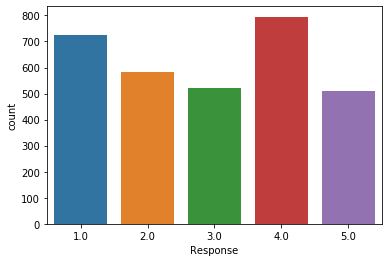

In [418]:
# Visualize distribution of responses overall
sns.countplot(x='Response', data=df_filtered);

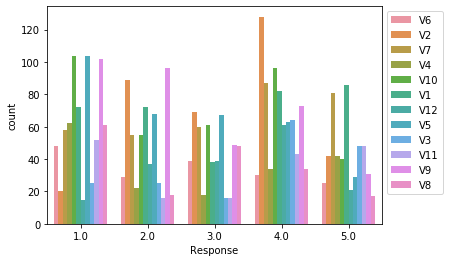

In [419]:
# Visualize distribution of responses per participant
ax = sns.countplot(x='Response', hue='counterbalance-mpke', data=df_filtered);
ax.legend(loc='best', bbox_to_anchor=(1,1))